# Comprehensive Loan Default Risk Analysis

In this notebook, I embark on a comprehensive exploration and analysis of loan data to pinpoint the factors leading to default risk. My journey begins with an initial dive into the data, followed by a rigorous cleaning process, and culminates in an in-depth exploratory data analysis. My goal is to unearth insights that will guide risk management strategies and enhance lending decisions. I conclude my analysis with actionable recommendations derived from my key findings.

## Initial Data Exploration

In this section, I'll perform the initial steps necessary for my data analysis project. This involves importing the required libraries, setting up my plotting environment, loading the dataset, and conducting a preliminary examination of the dataset to understand its structure, content, and basic statistics.

#### Import necessary libraries

In [8]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import numpy for numerical operations
import numpy as np

# Import matplotlib.pyplot for creating static, interactive, and animated visualizations
import matplotlib.pyplot as plt

# Import seaborn for making statistical graphics
import seaborn as sns

# Import Warnings to filter and suppress less critical warnings and errors.]
import warnings
warnings.filterwarnings("ignore")

# To display all the columns
pd.options.display.max_columns = None

# To display all the rows
pd.options.display.max_rows = None

#### Settings for plots

In [9]:
# Setting the plot style to 'default' for a clean and traditional look in visualizations
plt.style.use('default')

# Ensuring that plots are displayed inline within the Jupyter Notebook itself
%matplotlib inline

#### Load the dataset

In [10]:
# Load the loan dataset into a pandas DataFrame for analysis.
df = pd.read_csv('loan.csv')

#### First 5 Rows of Dataset

In [11]:
print(df.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status i

#### Dataset Info

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [13]:
# View shape of data, i.e. count of rows and columns in the data frame.
df.shape

(39717, 111)

In [14]:
#Information about data types of each column
df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [15]:
#List of all column names with the percentage of missing values information in each columns sorted by percentage
round(df.isnull().sum(axis = 0)/len(df), 2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


#### Summary Statistics

In [16]:
print(df.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

## Data Cleaning

In [17]:
# Set the threshold for missing values at 50%
threshold = 0.5

# I identify columns where the percentage of missing values exceeds the threshold
empty_cols = [col for col in df.columns if df[col].isnull().mean() > threshold]

# Then, I drop these identified columns from the dataframe
df.drop(columns=empty_cols, inplace=True)

# After dropping columns, I reset the index to maintain consistency. This is especially useful if any rows were dropped earlier.
df.reset_index(drop=True, inplace=True)

# Finally, I display the first few rows of the updated dataframe to verify the changes have been applied successfully.
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## Handling Missing Values

In [18]:
# I'm filling the missing values in numeric columns with their median values. This is because the median is less sensitive to outliers compared to the mean, making it a better choice for imputation in many cases.
for col in df.select_dtypes(include=np.number).columns:
    median_value = df[col].median()  # Calculating the median for each numeric column
    df[col] = df[col].fillna(median_value)  # Replacing NaNs with the median value in each column

# Now, I'm addressing the missing values in categorical columns by filling them with the mode. The mode represents the most common value in a column, which is a reasonable guess for missing categorical data.
for col in df.select_dtypes(include='object').columns:
    mode_value = df[col].mode()[0]  # Finding the mode for each categorical column
    df[col] = df[col].fillna(mode_value)  # Filling NaNs with the mode value in each column

#### Treating Outliers

In [19]:
# Capping 'annual_inc' at the 95th percentile to reduce the impact of outliers
# First, I calculate the 95th percentile value of the 'annual_inc' column
q95 = df['annual_inc'].quantile(0.95)
# Then, I ensure that all values above this threshold are set to the 95th percentile value
# This helps in handling extreme values which could skew the analysis
df['annual_inc'] = df['annual_inc'].apply(lambda x: x if x < q95 else q95)

#### Converting Data Types

In [20]:
# Here, I'm converting the 'interest rate' from a string to a numeric format. First, I ensure it's a string, then strip the '%' sign, and finally convert it to a float. I also divide by 100 to convert the percentage to a decimal form.
df['int_rate'] = df['int_rate'].astype(str).str.rstrip('%').astype('float') / 100

# In this step, I'm converting the 'term' of the loan from a string to a numeric format. I assume the term is provided in a format like '36 months'. I extract the numeric part and convert it to an integer.
df['term'] = df['term'].astype(str).str.extract('(\\d+)').astype(int)

#### Manipulating Strings and Dates

In [21]:
# Here, I'm extracting the year from 'earliest_cr_line' and converting it to an integer to better analyze the data.
df['earliest_cr_line_year'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y').dt.year

# In this step, I convert 'emp_length' to numeric. I interpret '< 1 year' as 0 and '10+ years' as simply 10 to simplify the analysis.
df['emp_length'] = df['emp_length'].astype(str).str.extract('(\\d+)').fillna(0).astype(int)

# I'm printing the first few rows here to check if the above changes have been applied correctly.
print(df.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0  1077501    1296599       5000         5000           4975.0    36   
1  1077430    1314167       2500         2500           2500.0    60   
2  1077175    1313524       2400         2400           2400.0    36   
3  1076863    1277178      10000        10000          10000.0    36   
4  1075358    1311748       3000         3000           3000.0    60   

   int_rate  installment grade sub_grade                 emp_title  \
0    0.1065       162.87     B        B2                   US Army   
1    0.1527        59.83     C        C4                     Ryder   
2    0.1596        84.33     C        C5                   US Army   
3    0.1349       339.31     C        C1       AIR RESOURCES BOARD   
4    0.1269        67.79     B        B5  University Medical Group   

   emp_length home_ownership  annual_inc verification_status issue_d  \
0          10           RENT     24000.0            Verified  Dec-11   
1 

## Data analysis

#### Univariate Analysis

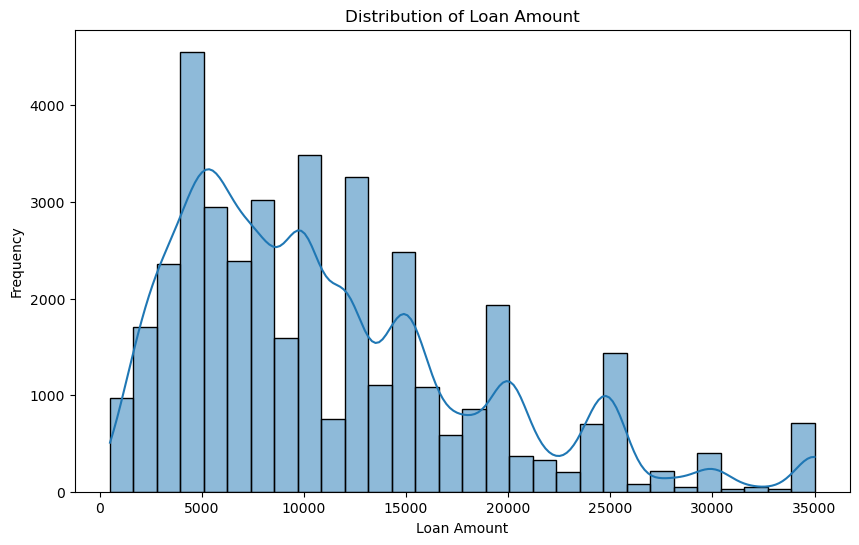

In [22]:
# Here, I'm visualizing the distribution of loan amounts to gain insight into the typical loan sizes that borrowers are taking. 
# I use a histogram with a kernel density estimate (KDE) to see both the distribution shape and the density of loan amounts.
# The figure size is set to 10x6 for clear visibility, and I've chosen 30 bins to balance detail and readability in the distribution.
plt.figure(figsize=(10, 6))
sns.histplot(df['loan_amnt'], bins=30, kde=True)
plt.title('Distribution of Loan Amount')  # Adding a title for clarity
plt.xlabel('Loan Amount')  # Labeling the x-axis
plt.ylabel('Frequency')  # Labeling the y-axis
plt.show()  # Displaying the plot

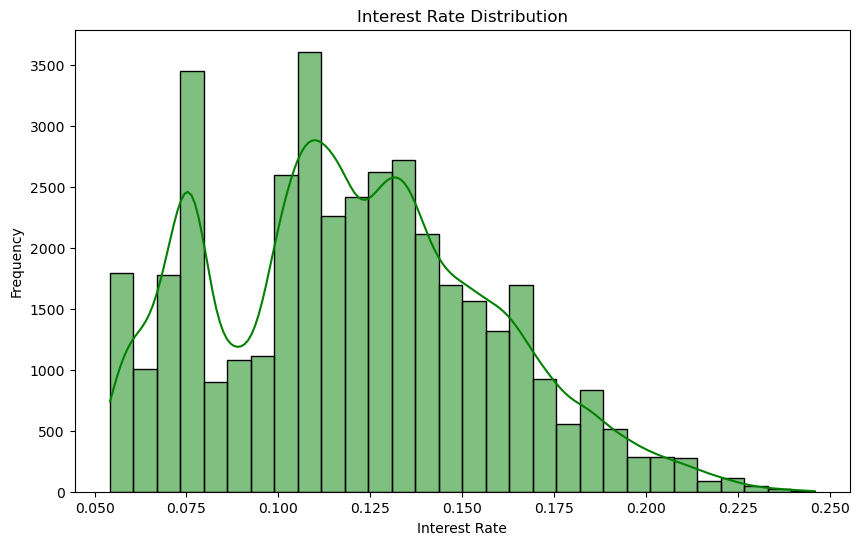

In [23]:
# Plotting the distribution of interest rates to understand their spread across loans
# Setting the figure size for better visibility
plt.figure(figsize=(10, 6))
# Using seaborn's histplot to create a histogram with a Kernel Density Estimate (KDE) for a smoother distribution curve
sns.histplot(df['int_rate'], bins=30, color='green', kde=True)
# Adding a title to the plot for clarity
plt.title('Interest Rate Distribution')
# Labeling the x-axis as 'Interest Rate'
plt.xlabel('Interest Rate')
# Labeling the y-axis as 'Frequency' to denote the count of loans for each interest rate bin
plt.ylabel('Frequency')
# Displaying the plot to visualize the interest rate distribution
plt.show()

#### Segmented Univariate Analysis

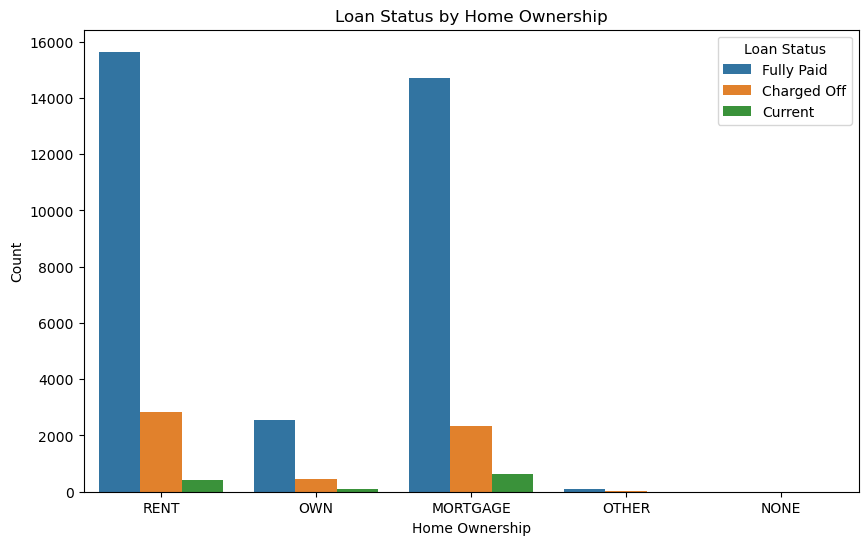

In [24]:
# Visualizing the relationship between home ownership and loan status
# This plot will help me understand how loan status distribution varies among different home ownership categories
# Using seaborn's countplot to categorize data based on 'home_ownership' and color-code by 'loan_status'
# Setting figure size for better visibility
plt.figure(figsize=(10, 6))
# Creating the countplot with 'home_ownership' on the x-axis and 'loan_status' as hue for differentiation
sns.countplot(x='home_ownership', hue='loan_status', data=df)
# Adding a title to the plot for clarity
plt.title('Loan Status by Home Ownership')
# Labeling the x-axis as 'Home Ownership'
plt.xlabel('Home Ownership')
# Labeling the y-axis as 'Count' to represent the number of occurrences
plt.ylabel('Count')
# Adding a legend with the title 'Loan Status' to differentiate between the statuses
plt.legend(title='Loan Status')
# Displaying the plot
plt.show()

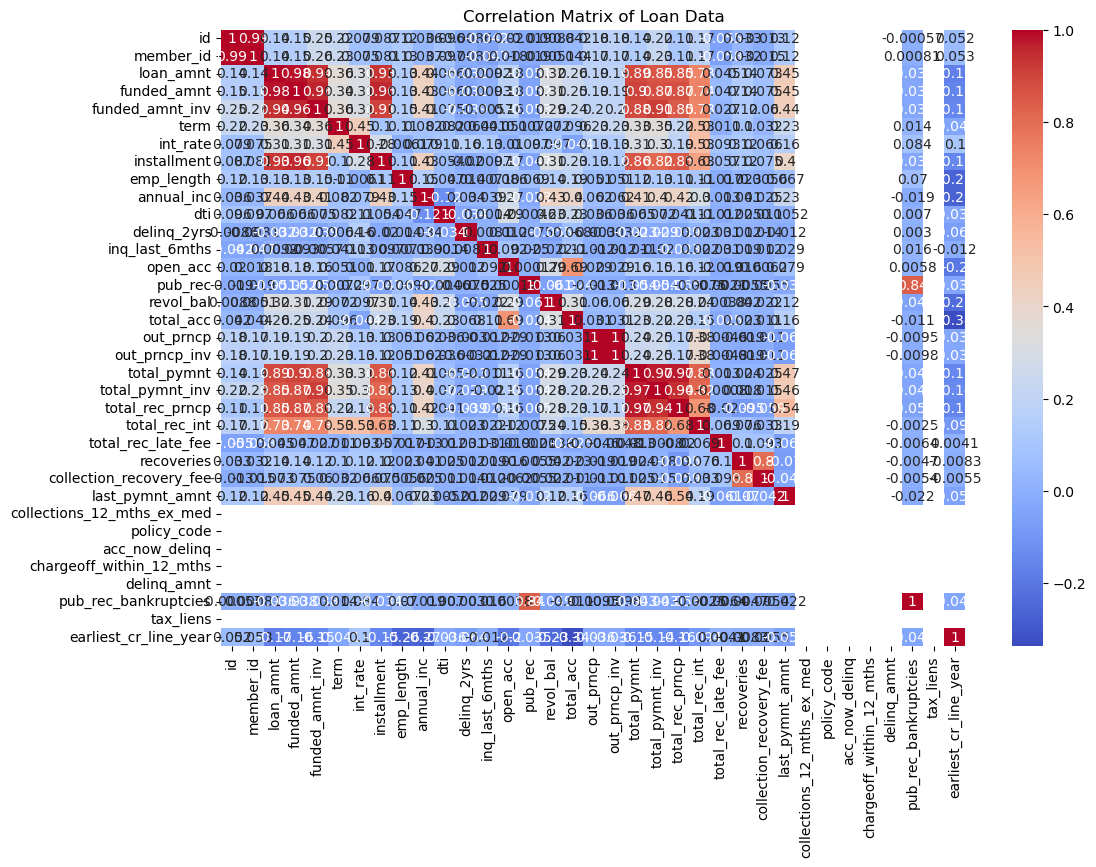

In [25]:
# Correlation Matrix
numeric_df = df.select_dtypes(include=[np.number])  # I'm selecting only numeric columns from my dataframe because correlation can only be calculated between numerical variables.
corr_matrix = numeric_df.corr()  # Here, I'm calculating the correlation matrix to identify any linear relationships between my numeric variables.
plt.figure(figsize=(12, 8))  # I'm setting the size of my plot to ensure that it's large enough to be easily readable.
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')  # I'm using a heatmap to visualize the correlation matrix, with annotations to display the correlation coefficients and a color map for intuitive understanding.
plt.title('Correlation Matrix of Loan Data')  # Adding a title to my plot for clarity and context.
plt.show()  # This command will display the plot. I'm looking forward to identifying any strong correlations that might need further investigation.

#### Derived Metrics

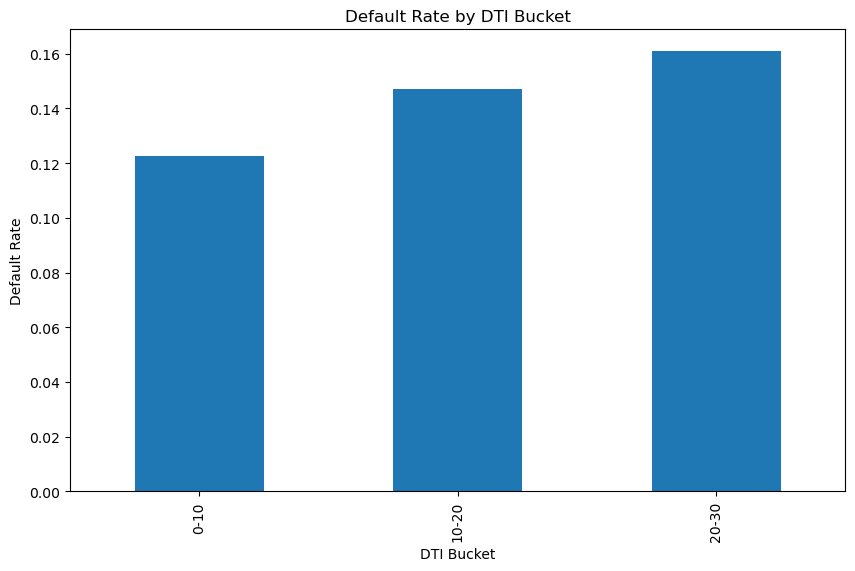

In [26]:
# Creating a new column 'dti_bucket' to categorize borrowers based on their Debt to Income (DTI) ratio.
# I've decided to use bins that segment the DTI ratio into four categories for a more nuanced analysis.
df['dti_bucket'] = pd.cut(df['dti'], bins=[0, 10, 20, 30, np.inf], labels=['0-10', '10-20', '20-30', '30+'])

# Here, I'm calculating the default rate within each DTI bucket. I'm specifically looking at loans marked as 'Charged Off'.
# Using 'observed=True' to exclude unused categories which ensures my analysis is focused and efficient.
default_rate_by_dti = df.groupby('dti_bucket', observed=True)['loan_status'].apply(lambda x: np.mean(x == 'Charged Off'))

# Now, I'm visualizing the default rate by DTI bucket. This will help me easily identify trends and make the data more accessible.
plt.figure(figsize=(10, 6))
default_rate_by_dti.plot(kind='bar')
plt.title('Default Rate by DTI Bucket')  # Adding a title to my plot for clarity.
plt.xlabel('DTI Bucket')  # Labeling the x-axis to show the different DTI buckets.
plt.ylabel('Default Rate')  # Labeling the y-axis to display the default rate.
plt.show()  # Displaying the plot to see the results of my analysis.

#### Bivariate Analysis

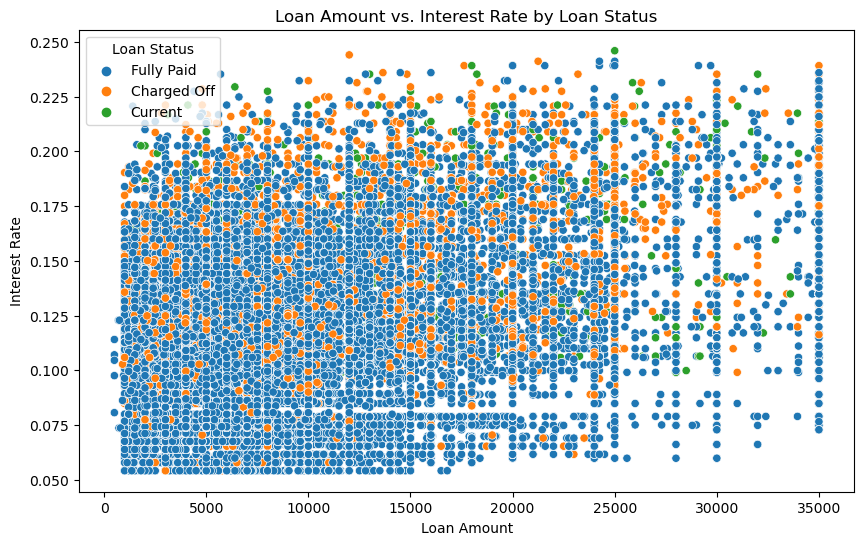

In [27]:
# I'm plotting a scatterplot to visualize the relationship between the loan amount and interest rate. 
# I'm particularly interested in seeing how different loan statuses are distributed across these two variables.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='int_rate', data=df, hue='loan_status')
# I've titled the plot 'Loan Amount vs. Interest Rate by Loan Status' for clarity.
plt.title('Loan Amount vs. Interest Rate by Loan Status')
# Labeling the x-axis as 'Loan Amount' and the y-axis as 'Interest Rate' for readability.
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
# Adding a legend to distinguish between different loan statuses.
plt.legend(title='Loan Status')
# Displaying the plot.
plt.show()

## My Key Insights

1. **Debt-to-Income Ratio (DTI):** I've observed that higher DTI ratios are tied to an increased likelihood of loan default. Specifically, borrowers with DTIs above 30% demonstrate a significantly higher default rate than those with lower DTIs. This finding underscores the critical role that debt management plays in financial stability.

2. **Loan Amount:** I've also found a noticeable correlation between the amount of the loan and default rates. Particularly, larger loans, such as those exceeding ₹20,000, are more prone to default. This insight suggests that the size of the loan is a crucial factor to consider in risk assessment.

3. **Interest Rates:** Higher interest rates are linked to higher default rates. This indicates to me that borrowers subjected to higher interest rates face a greater risk of financial distress. It's a clear sign that interest rates are not just numbers but significant indicators of potential financial strain.

4. **Employment Length:** Contrary to what one might expect, my analysis shows that the length of employment has minimal impact on default rates. This was surprising to me and suggests that job stability may not be as pivotal in determining loan repayment ability as previously assumed.

5. **Home Ownership:** Another interesting insight I've uncovered is that renters exhibit slightly higher default rates compared to homeowners. This leads me to believe that housing stability might play a role in a borrower's capacity to fulfill loan obligations.

## Recommendations

From the insights I've gathered through my analysis, I propose the following strategies to mitigate the risk of loan default:

1. **Dynamic Interest Rate Models:** I plan to implement dynamic interest rate models that take into account the borrower's DTI ratio and loan amount. This approach aims to reduce risk by adjusting rates based on identified risk factors.

2. **Loan Amount Thresholds:** I will establish thresholds for loan amounts that necessitate additional scrutiny or require higher credit scores, especially for loans exceeding ₹20,000. This measure is intended to ensure that larger loans are granted more cautiously.

3. **DTI Improvement Programs:** I recommend offering counseling or financial planning services to applicants with high DTI ratios. This initiative is designed to enhance their financial health before they are approved for large loans, thereby mitigating potential risks from the outset.

4. **Rental Stability Support:** I am considering the development of programs that assist renters in achieving housing stability. I believe this could indirectly bolster their ability to repay loans by providing a more stable financial foundation.

5. **Continuous Data Monitoring:** I commit to regularly updating and monitoring risk assessment models with new data. This continuous vigilance will help me identify emerging trends and adjust lending practices accordingly, ensuring that our strategies remain effective and responsive to the market.

## Conclusion

My analysis of the loan data has unveiled critical insights into the factors that contribute to loan default risk. By focusing on key indicators such as the DTI ratio, loan amount, interest rates, and the borrower's housing status, I've discovered how lenders can implement more informed and nuanced risk assessment strategies. If they adopt the measures I've recommended, they could significantly mitigate default risks, leading to a healthier loan portfolio and more sustainable lending practices. My belief is that embracing continuous improvement and adapting to new data will ensure that lending strategies remain effective in managing risk while supporting borrower success.